The dataset consists of roughly 180k transactions and 53 features from supply chains used by the company DataCo Global
for 3 years.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datetime import timedelta
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv(r"D:\Downloads\DataCoSupplyChainDataset.csv" ,encoding='ISO-8859-1')

## EDA

In [4]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [6]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [7]:
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


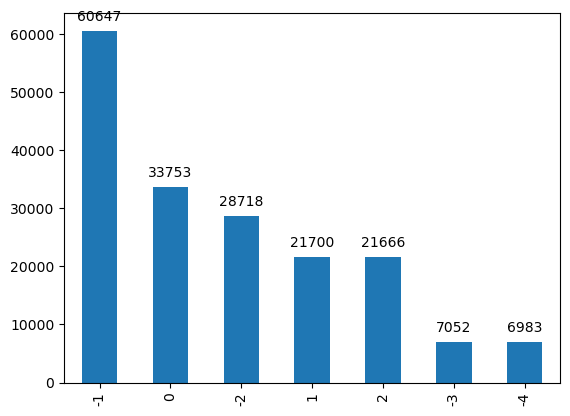

In [8]:
data["Days_taken"]=data["Days for shipment (scheduled)"]-data["Days for shipping (real)"]

ax=data["Days_taken"].value_counts().plot(kind="bar")
# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()

In [14]:
column_datatypes = df.dtypes
con_cols = list(column_datatypes[(column_datatypes == "float64") | (column_datatypes == "int64")].index.values)
cat_cols = list(column_datatypes[column_datatypes=="object"].index.values)

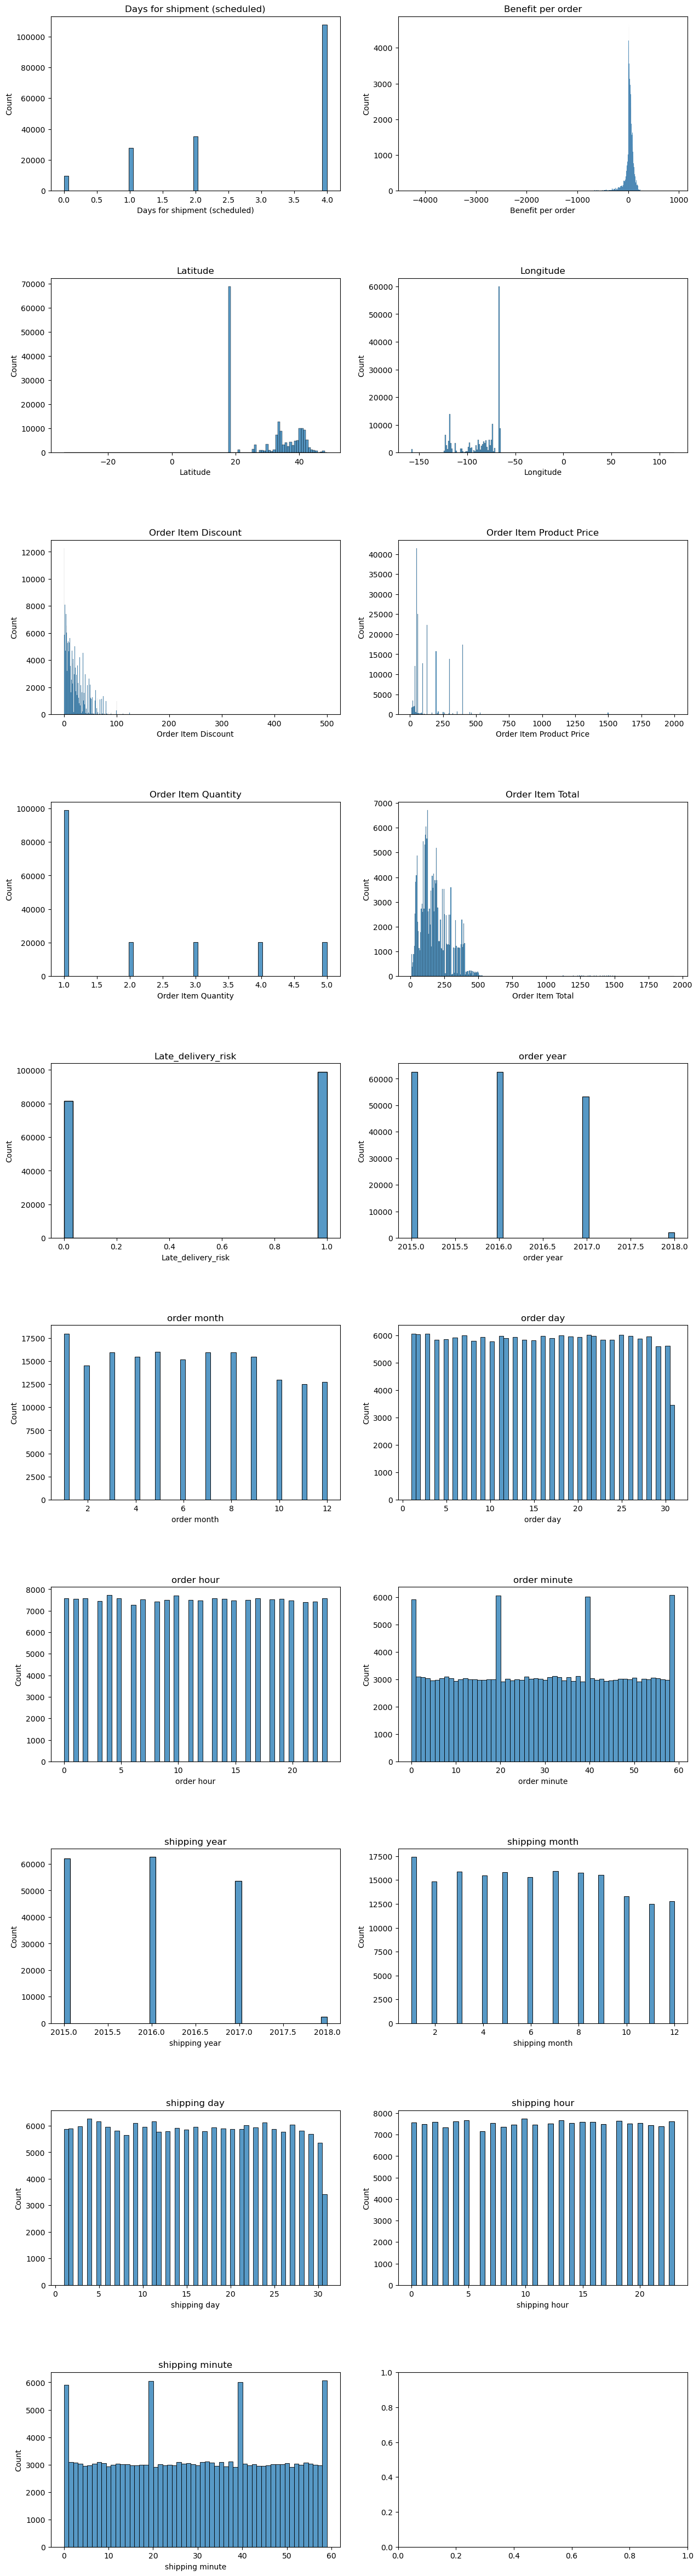

In [15]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15,60))
plt.subplots_adjust(hspace=0.5)

#Construct subplots 
for col , ax in zip(con_cols , axs.ravel()):
    sns.histplot(ax = ax ,data=df, x= col).set(title=col)

plt.show()

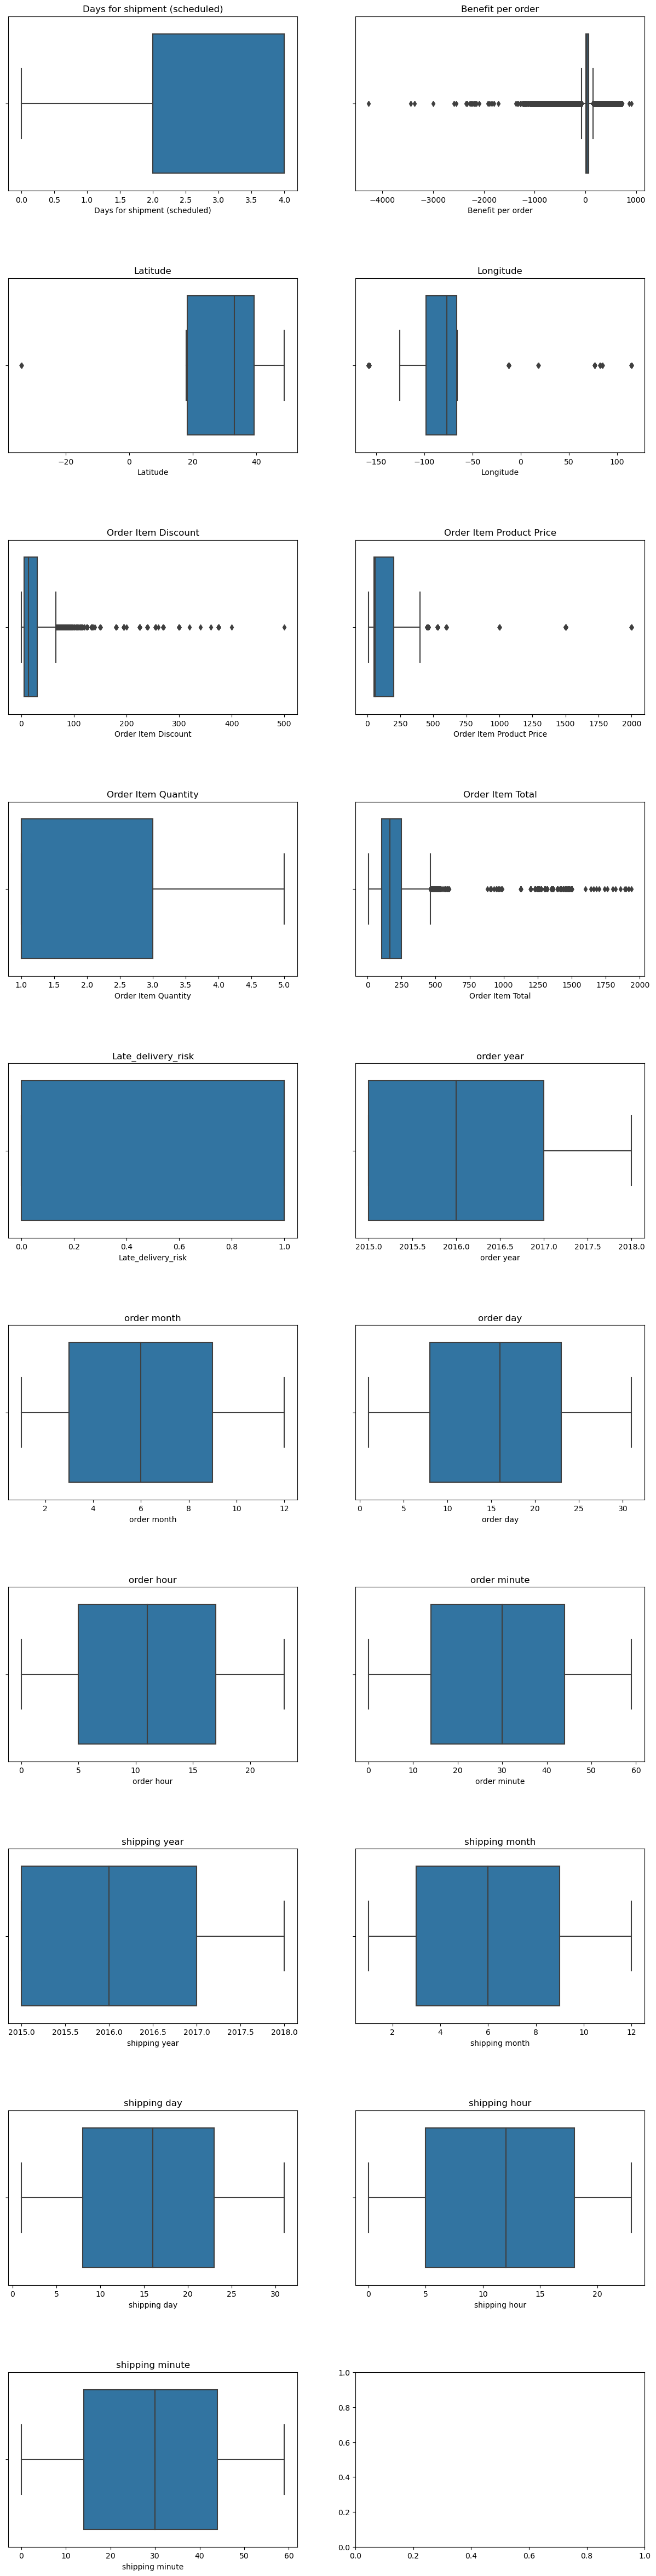

In [16]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 60))
plt.subplots_adjust(hspace=0.5)

for col , ax in zip(con_cols , axs.ravel()):
    sns.boxplot(ax = ax ,data=df, x= col).set(title=col)

plt.show()

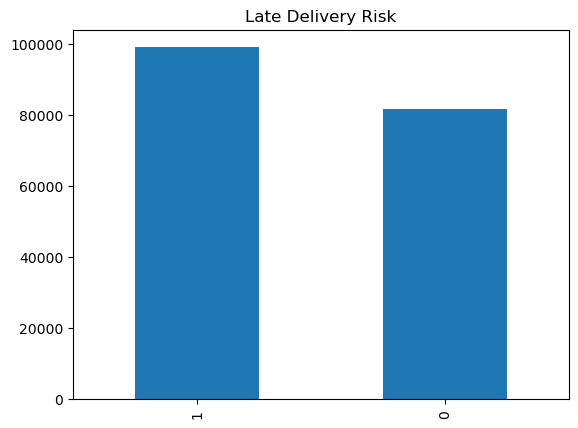

In [17]:
df["Late_delivery_risk"].value_counts().plot(kind="bar",title="Late Delivery Risk")
plt.show()

## Data preprocessing

In [9]:
df=data.loc[:,['Type','Days for shipment (scheduled)','order date (DateOrders)','Benefit per order','Category Name','Latitude','Longitude','Customer Segment','Department Name','Market','Order City','Order Country','Order Item Discount','Order Item Product Price','Order Item Quantity','Order Item Total','Order State','Product Name','shipping date (DateOrders)','Shipping Mode','Late_delivery_risk','Order Status']]

In [10]:
df['order date']= pd.to_datetime(df['order date (DateOrders)'])
df['shipping date']= pd.to_datetime(df['shipping date (DateOrders)'])

In [11]:
df['order year']=df['order date'].dt.year
df['order month']=df['order date'].dt.month
df['order day']=df['order date'].dt.day
df['order hour']=df['order date'].dt.hour
df['order minute']=df['order date'].dt.minute

df['shipping year']=df['shipping date'].dt.year
df['shipping month']=df['shipping date'].dt.month
df['shipping day']=df['shipping date'].dt.day
df['shipping hour']=df['shipping date'].dt.hour
df['shipping minute']=df['shipping date'].dt.minute

df.drop(columns=['order date (DateOrders)','shipping date (DateOrders)','order date','shipping date'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Category Name                  180519 non-null  object 
 4   Latitude                       180519 non-null  float64
 5   Longitude                      180519 non-null  float64
 6   Customer Segment               180519 non-null  object 
 7   Department Name                180519 non-null  object 
 8   Market                         180519 non-null  object 
 9   Order City                     180519 non-null  object 
 10  Order Country                  180519 non-null  object 
 11  Order Item Discount            180519 non-null  float64
 12  Order Item Product Price      

In [13]:
df.isnull().sum()

Type                             0
Days for shipment (scheduled)    0
Benefit per order                0
Category Name                    0
Latitude                         0
Longitude                        0
Customer Segment                 0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Item Discount              0
Order Item Product Price         0
Order Item Quantity              0
Order Item Total                 0
Order State                      0
Product Name                     0
Shipping Mode                    0
Late_delivery_risk               0
Order Status                     0
order year                       0
order month                      0
order day                        0
order hour                       0
order minute                     0
shipping year                    0
shipping month                   0
shipping day                     0
shipping hour       

In [18]:
df.shape

(180519, 30)

In [19]:
for i in df.columns:
    print(i,"\n",df[i].value_counts())
    print('--'*40)

Type 
 DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64
--------------------------------------------------------------------------------
Days for shipment (scheduled) 
 4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64
--------------------------------------------------------------------------------
Benefit per order 
  0.000000      1177
 143.990005     199
 72.000000      194
 46.799999      188
 24.000000      181
               ... 
-48.830002        1
 48.220001        1
-145.729996       1
-330.109985       1
-337.100006       1
Name: Benefit per order, Length: 21998, dtype: int64
--------------------------------------------------------------------------------
Category Name 
 Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Card

In [20]:
count_encoder = {}
for i in df.columns:
    if df[i].dtype=="object":
        count_encoder[i] = ce.CountEncoder()
        # Fit and transform the 'Category' column
        df[i] = count_encoder[i].fit_transform(df[i])

In [21]:
df.head()

,Type,Days for shipment (scheduled),Benefit per order,Category Name,Latitude,Longitude,Customer Segment,Department Name,Market,Order City,...,order year,order month,order day,order hour,order minute,shipping year,shipping month,shipping day,shipping hour,shipping minute
0,69295,4,91.250000,357,18.251453,-66.037056,93504,2479,41260,180,...,2018,1,31,22,56,2018,2,3,22,56
1,49883,4,-249.089996,357,18.279451,-66.037064,93504,2479,41260,15,...,2018,1,13,12,27,2018,1,18,12,27
2,19616,4,-247.779999,357,37.292233,-121.881279,93504,2479,41260,15,...,2018,1,13,12,6,2018,1,17,12,6
3,69295,4,22.860001,357,34.125946,-118.291016,32226,2479,41260,114,...,2018,1,13,11,45,2018,1,16,11,45
4,41725,4,134.210007,357,18.253769,-66.037048,54789,2479,41260,114,...,2018,1,13,11,24,2018,1,15,11,24


In [30]:
from sklearn.feature_selection import f_classif
# Separate features and target variable
X = df.drop('Late_delivery_risk', axis=1)
y = df['Late_delivery_risk']

# Calculate Fisher's scores and p-values
fisher_scores, p_values = f_classif(X, y)

# Create a DataFrame to display the scores and p-values
result_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': fisher_scores, 'P_Value': p_values})

print("Fisher's Score and P-Value for each feature:")
print(result_df)

Fisher's Score and P-Value for each feature:
                          Feature  Fisher_Score        P_Value
0                            Type     13.159147   2.861979e-04
1   Days for shipment (scheduled)  28516.503437   0.000000e+00
2               Benefit per order      2.507506   1.133069e-01
3                   Category Name      2.899120   8.862965e-02
4                        Latitude      0.083212   7.729910e-01
5                       Longitude      0.661915   4.158858e-01
6                Customer Segment      0.230265   6.313278e-01
7                 Department Name      1.064441   3.022058e-01
8                          Market      0.002402   9.609084e-01
9                      Order City      2.587030   1.077439e-01
10                  Order Country      1.416471   2.339867e-01
11            Order Item Discount      0.101516   7.500182e-01
12       Order Item Product Price      0.854158   3.553800e-01
13            Order Item Quantity      0.003499   9.528277e-01
14        

In [35]:
df1=df[['Type','Days for shipment (scheduled)','Shipping Mode','Order Status','order hour','shipping hour','Late_delivery_risk']]

In [36]:
df1

,Type,Days for shipment (scheduled),Shipping Mode,Order Status,order hour,shipping hour,Late_delivery_risk
0,69295,4,107752,59491,22,22,0
1,49883,4,107752,20227,12,12,1
2,19616,4,107752,19616,12,12,0
3,69295,4,107752,59491,11,11,0
4,41725,4,107752,39832,11,11,0
...,...,...,...,...,...,...,...
180514,19616,4,107752,19616,3,3,0
180515,69295,2,35216,59491,1,1,1
180516,49883,4,107752,20227,21,21,1
180517,41725,4,107752,39832,20,20,0


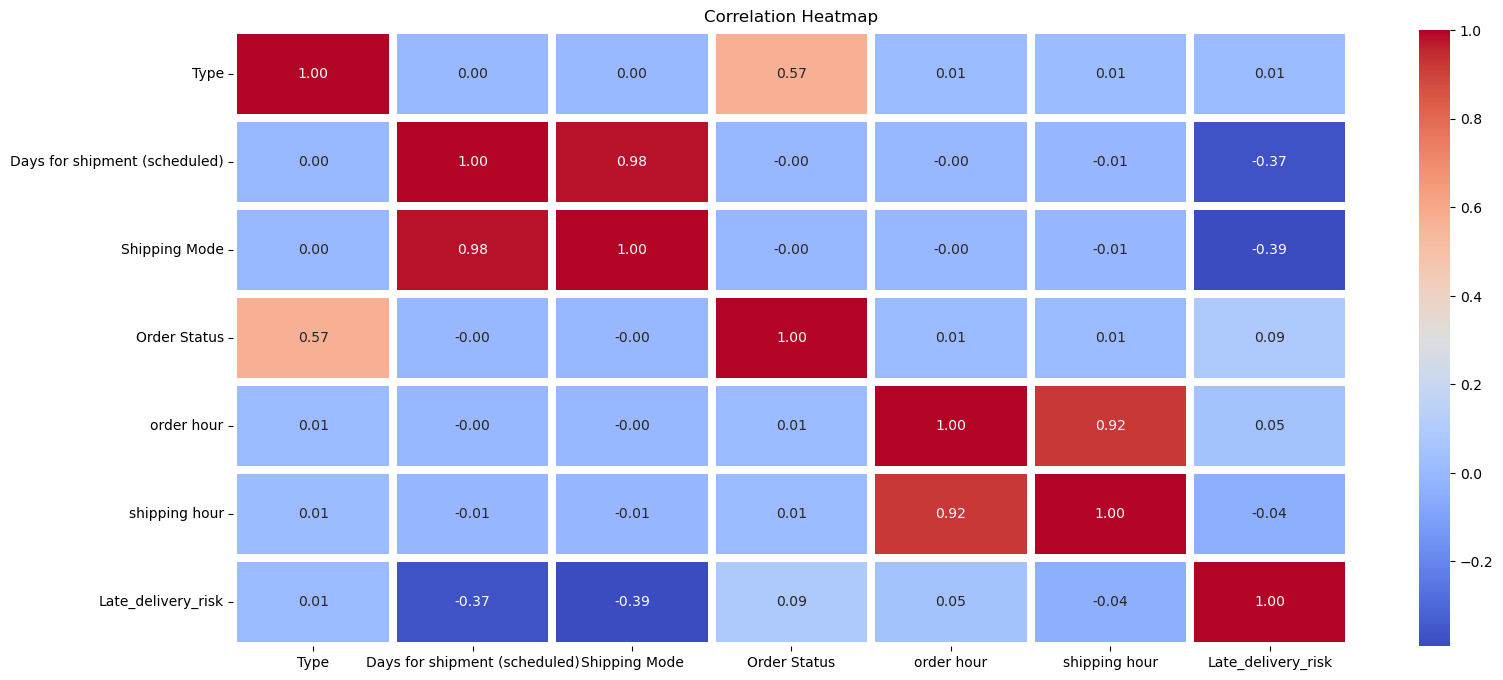

In [37]:
correlation_matrix = df1.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=4.5)
plt.title("Correlation Heatmap")
plt.show()

In [38]:
df1.drop(columns=['Days for shipment (scheduled)'],inplace=True)

C:\Users\pradd\AppData\Local\Temp\ipykernel_38756\1358955707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Days for shipment (scheduled)'],inplace=True)


# Model building to predict Late Delivery Risk

In [50]:
# Separate features and target variable
X = df1.drop('Late_delivery_risk', axis=1)
y = df1['Late_delivery_risk']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_reg_model = LogisticRegression()

# Train the model on the training set
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.648460004431642
Confusion Matrix:
 [[ 8985  7322]
 [ 5370 14427]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59     16307
           1       0.66      0.73      0.69     19797

    accuracy                           0.65     36104
   macro avg       0.64      0.64      0.64     36104
weighted avg       0.65      0.65      0.65     36104



In [44]:
X = df1.drop(columns=['Late_delivery_risk'])
y = df1["Late_delivery_risk"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=42, class_weight={0.0: 1, 1.0: 1.2})

# Fit the model on the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.73
Confusion Matrix:
[[18082  2314]
 [ 9749 14985]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     20396
           1       0.87      0.61      0.71     24734

    accuracy                           0.73     45130
   macro avg       0.76      0.75      0.73     45130
weighted avg       0.77      0.73      0.73     45130

